# Problem Statement:
**Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"  
Data Description :  
Undergrad : person is under graduated or not  
Marital.Status : marital status of a person  
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government   
Work Experience : Work experience of an individual person  
Urban : Whether that person belongs to urban area or not** 

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [85]:
#Load the csv file containing data
data = pd.read_csv("Fraud_check.csv",encoding='latin1', error_bad_lines = False)
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# EDA and Data preparation

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


<AxesSubplot:>

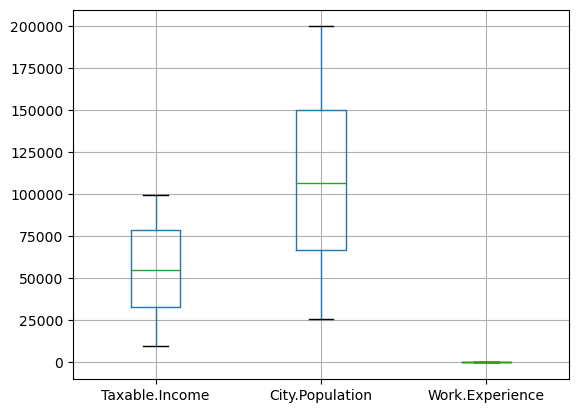

In [67]:
data.boxplot()

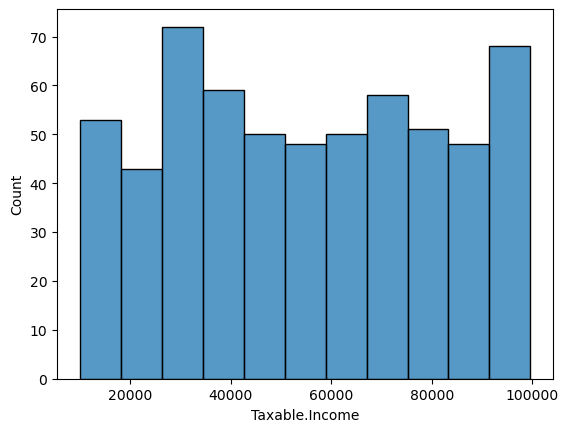

In [71]:
sns.histplot(data["Taxable.Income"])
plt.show()

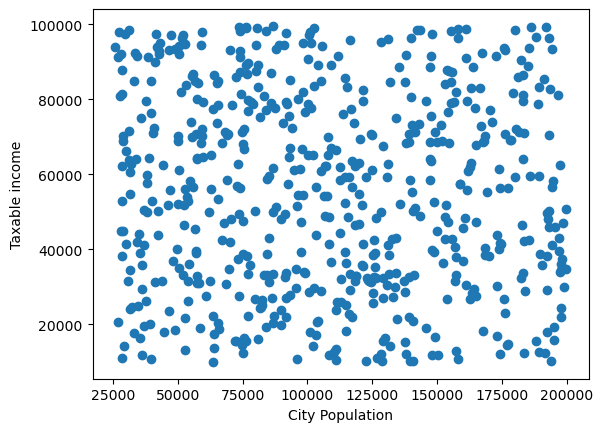

In [74]:
plt.scatter(data["City.Population"], data["Taxable.Income"])
plt.xlabel("City Population")
plt.ylabel("Taxable income")
plt.show()

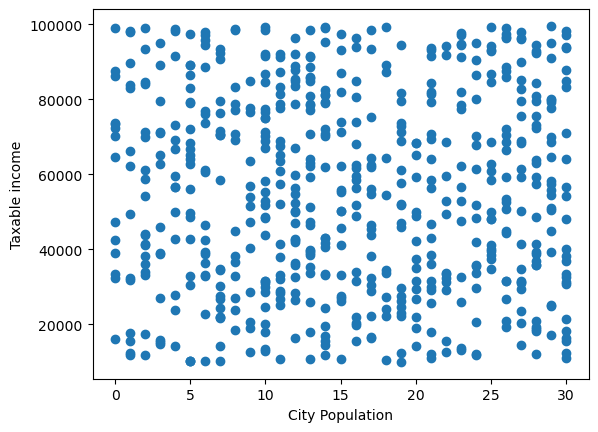

In [87]:
plt.scatter(data["Work.Experience"], data["Taxable.Income"])
plt.xlabel("City Population")
plt.ylabel("Taxable income")
plt.show()

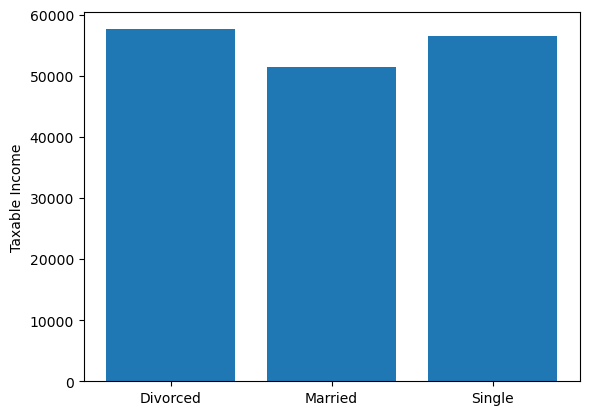

In [80]:
df1 = data.groupby("Marital.Status").mean().reset_index()
plt.bar(df1["Marital.Status"], df1["Taxable.Income"])
plt.ylabel("Taxable Income")
plt.show()

**All the input varibles look completely independent and the data does not show any outliers**

In [89]:
# converting sales from continous to catagorical varible
taxable_income = []
for income in data["Taxable.Income"]:
    if income<=30000:
         taxable_income.append("Risky")
    else:
        taxable_income.append("Good")
data["taxable_income"] = taxable_income

In [90]:
# renaming the columns
data.columns = ["undergrad","maritul_status","taxable_income","city_population", "work_experience","urban","fraud_check"]
data.head()

,undergrad,maritul_status,taxable_income,city_population,work_experience,urban,fraud_check
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


<AxesSubplot:xlabel='fraud_check', ylabel='count'>

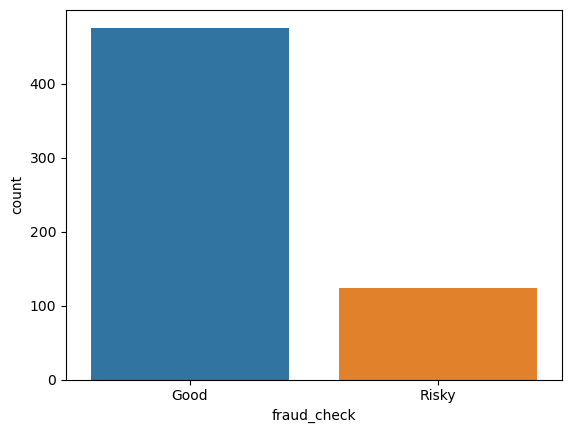

In [91]:
data.fraud_check.value_counts()
sns.countplot(data.fraud_check)

In [92]:
X = data.drop(["taxable_income", "fraud_check"], axis = 1)
Y = data["fraud_check"]


In [93]:
le = preprocessing.LabelEncoder()
Y_label = le.fit_transform(Y)
Y_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in X.columns:
    if X[col].dtype in ["int64", "float64"]:
        X[col] = scaler.fit_transform(X[[col]])

In [95]:
X_new = pd.get_dummies(X)
X_new

,city_population,work_experience,undergrad_NO,undergrad_YES,maritul_status_Divorced,maritul_status_Married,maritul_status_Single,urban_NO,urban_YES
0,-1.178521,-0.629143,1,0,0,0,1,0,1
1,0.508500,0.276370,0,1,1,0,0,0,1
2,1.033109,1.634639,1,0,0,1,0,0,1
3,1.696831,-0.063197,0,1,0,0,1,0,1
4,-1.630532,1.408261,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,-1.390432,-0.968710,0,1,1,0,0,0,1
596,-1.071672,-1.534655,0,1,1,0,0,0,1
597,0.909696,-1.761033,1,0,1,0,0,0,1
598,1.432197,0.163181,0,1,0,1,0,1,0


In [96]:
x_train, x_test, y_train, y_test = train_test_split(X_new, Y_label, train_size=0.7, random_state = 42)

# model building

In [97]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

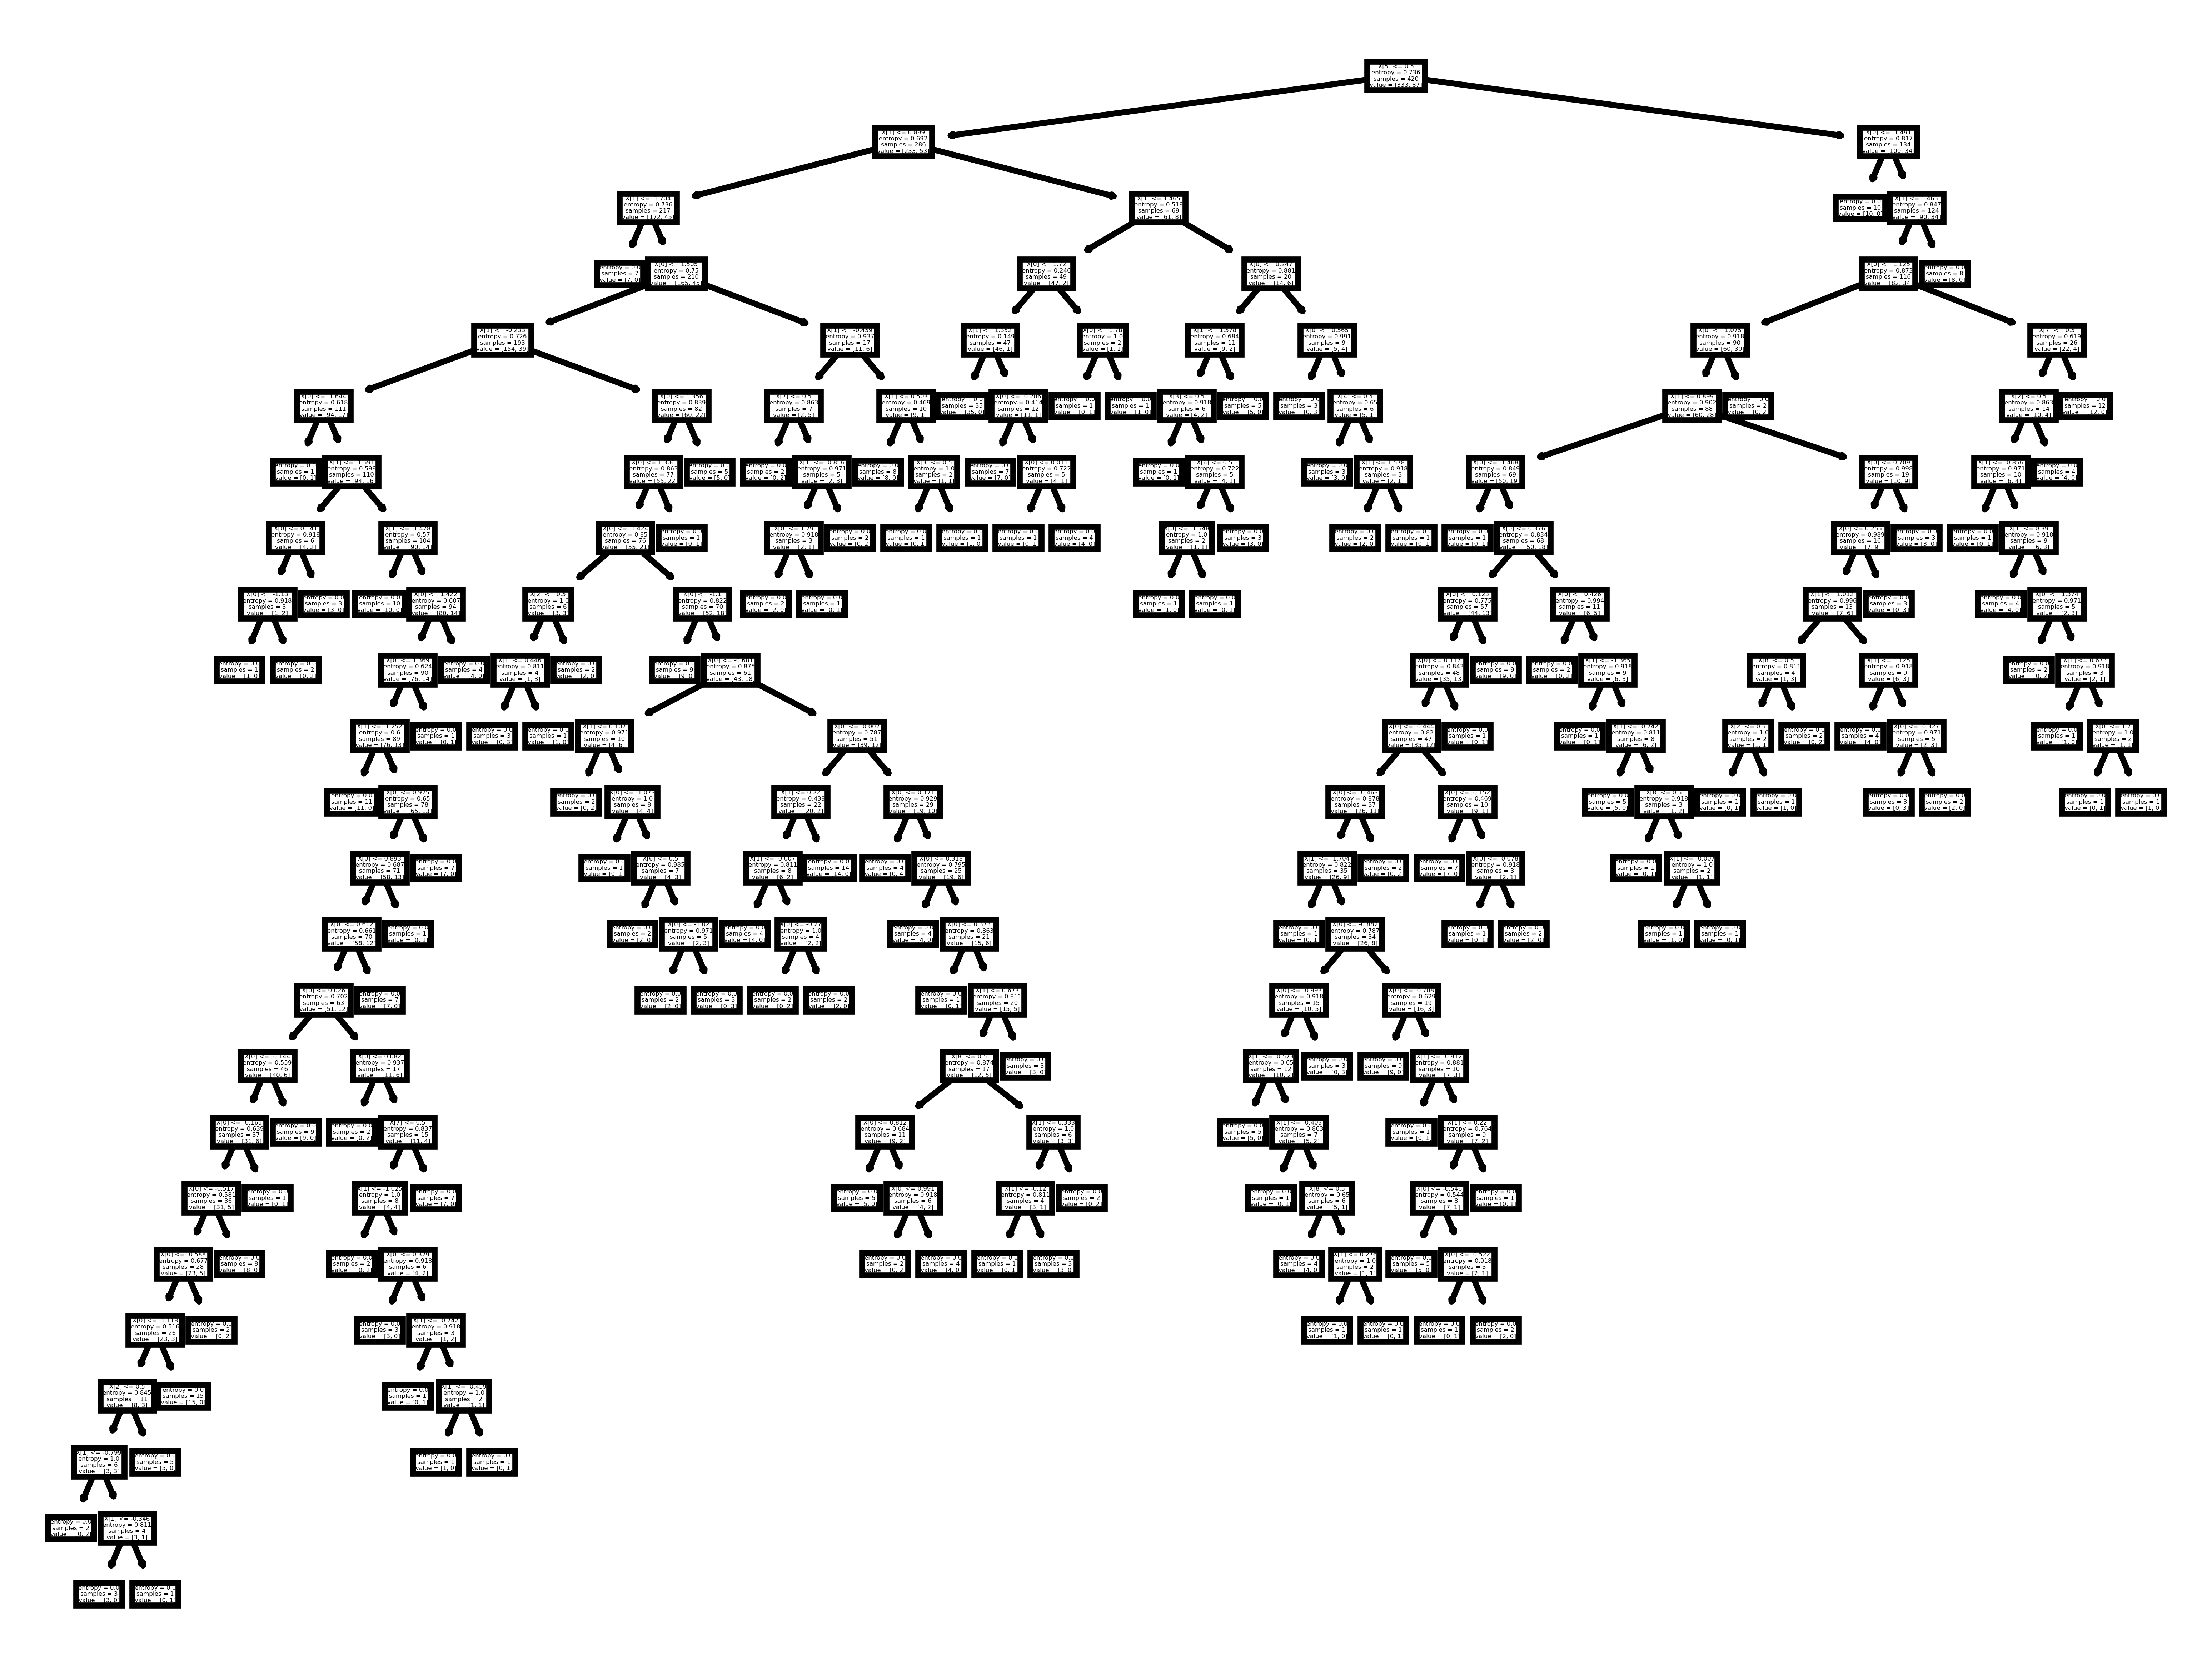

In [98]:
#PLot the decision tree
plt.figure(dpi=1200)
tree.plot_tree(model)
plt.show()

In [99]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
preds

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0])

# model evaluation

In [100]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74       143
           1       0.16      0.22      0.19        37

    accuracy                           0.61       180
   macro avg       0.47      0.46      0.47       180
weighted avg       0.65      0.61      0.63       180



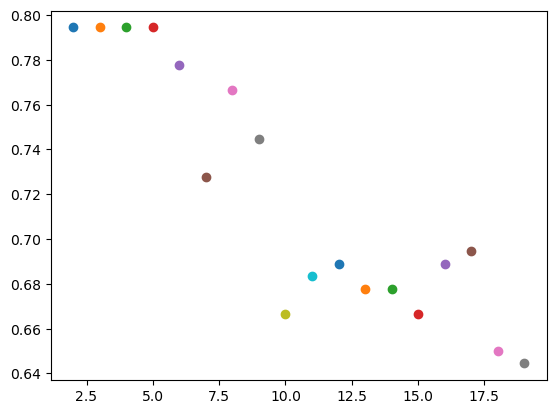

In [40]:
# finding max_depth
from sklearn.metrics import accuracy_score
max_depth = list(range(2,20))
Accu = []
for value in max_depth:
    model = DecisionTreeClassifier(criterion = 'entropy',max_depth = value, random_state = 42)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    Accu.append(acc)
    plt.scatter(x= value, y = acc)
plt.show()

In [112]:
model_final = DecisionTreeClassifier(criterion = 'entropy',max_depth = 4, random_state = 42)
model_final.fit(x_train,y_train)
y_pred = model_final.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(round(acc, 3))
print(classification_report(y_test, y_pred))

0.794
              precision    recall  f1-score   support

           0       0.79      1.00      0.89       143
           1       0.00      0.00      0.00        37

    accuracy                           0.79       180
   macro avg       0.40      0.50      0.44       180
weighted avg       0.63      0.79      0.70       180



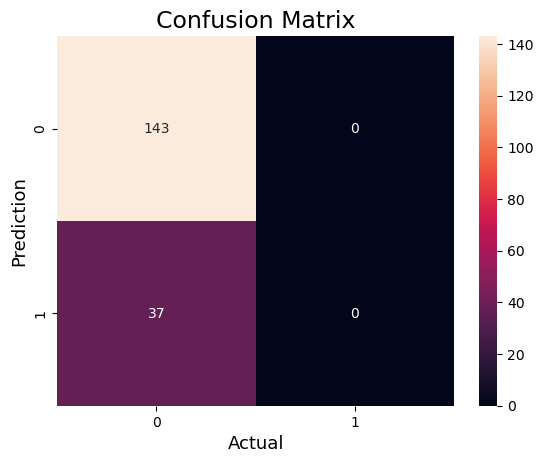

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

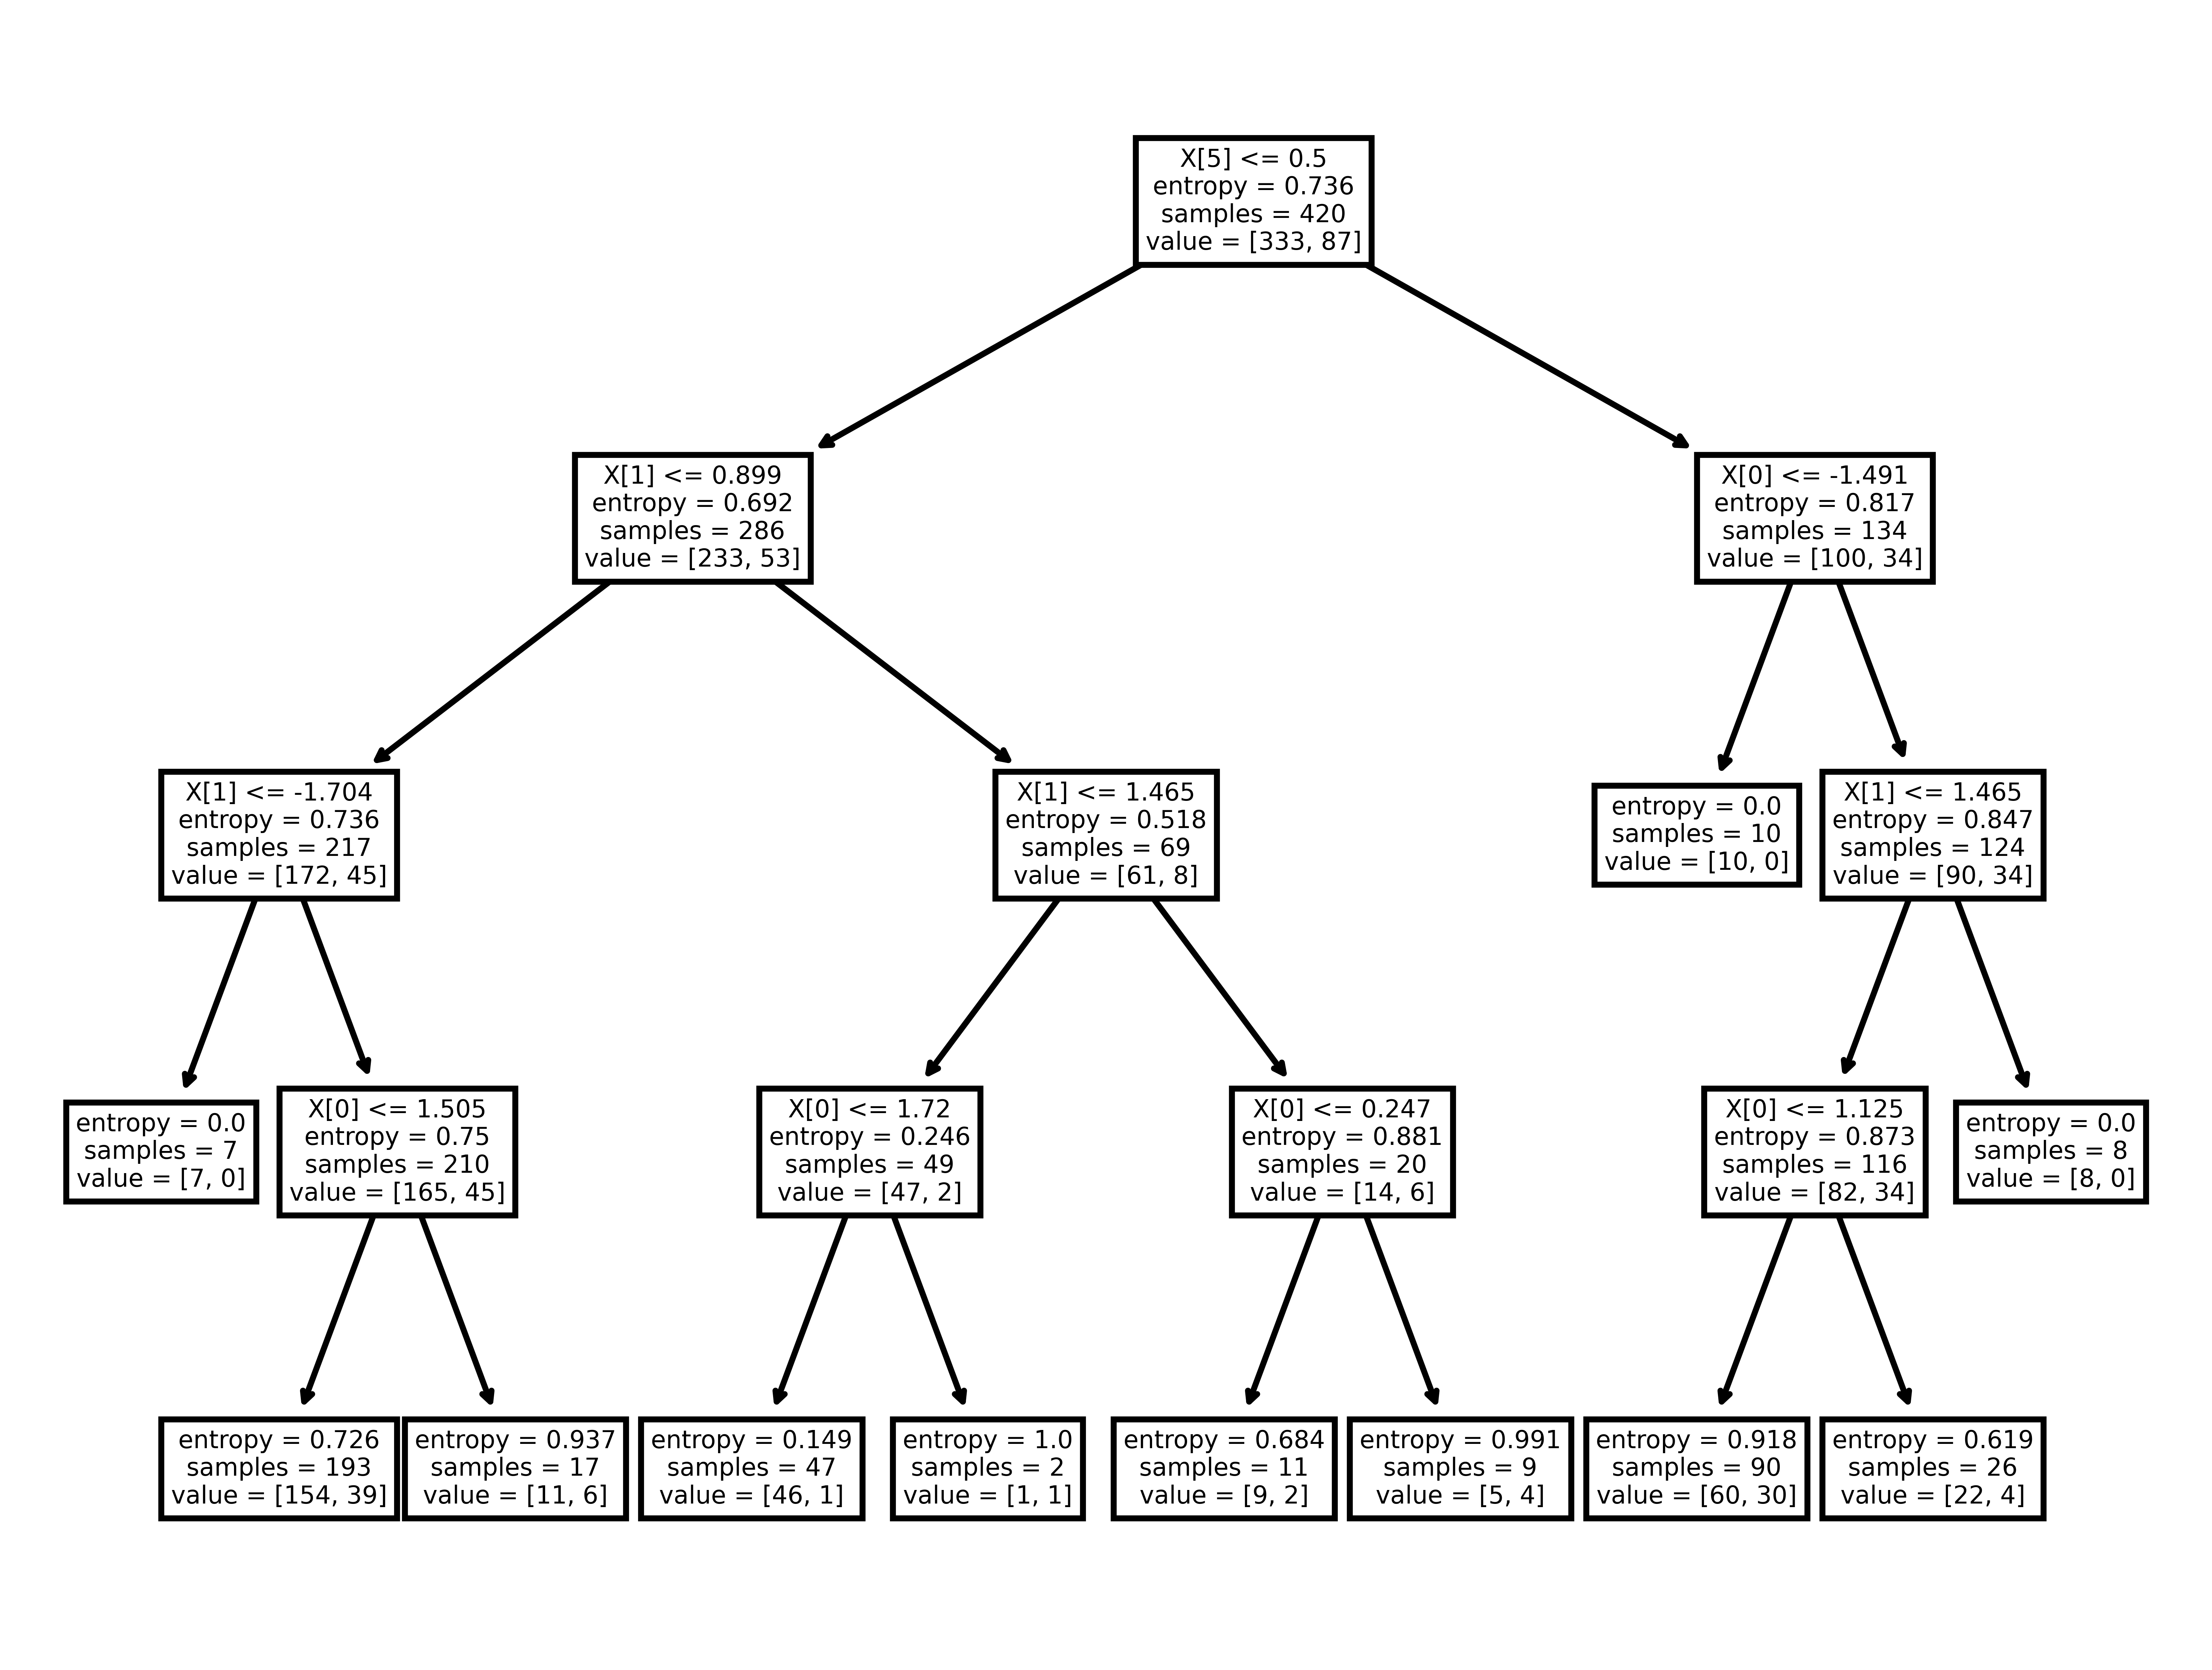

In [102]:
#PLot the decision tree
plt.figure(dpi=1200)
tree.plot_tree(model_final)
plt.show()